In [117]:
import pandas as pd
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import cycle, islice
from matplotlib import rcParams
import matplotlib.pyplot as plt

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Gulim'

cure = pd.read_csv('data/심리·정서적_상처에_대한_치료나_치유_20221130142320.csv', encoding = 'cp949')
help = pd.read_csv('data/심리상담_도움_여부_20221130142615 (1).csv', encoding = 'cp949')
pre_teacher = pd.read_csv('data/여성가족부_청소년상담지원현황_20211231 (1).csv', encoding = 'cp949')
support = pd.read_csv('data/여성가족부_청소년상담지원현황_20211231 (1).csv', encoding = 'cp949')

advice = pd.read_csv('data/연도별 전국 청소년 상담내용 현황.csv', encoding = 'cp949')
client = pd.read_csv('data/연도별 전국 청소년 상담내용 현황.csv', encoding = 'cp949')

suicide = pd.read_csv('data/자살률(연령별)_20221130142519.csv')
si_do = pd.read_csv('data/지역 단위별_상담이력.csv')
mental = pd.read_csv('data/청소년+정신건강_20221130134609.csv')
info = pd.read_csv('data/청소년상담복지센터__학교_밖_청소년_지원센터__청소년쉼터_등_지역사회의_다양한_청소년_지원_기관에_대한_정보_20221130142227 (1).csv', encoding = 'cp949')

teacher = pd.read_csv('data/청소년지도사 현황.csv', encoding = 'cp949')
center = pd.read_csv('data/한국청소년상담복지개발원_전국_청소년상담복지센터_20210930.csv', encoding = 'cp949')

consulting = pd.read_csv('data/consulting.csv', encoding = 'cp949')

# 청소년 심리 상담 현황

## 심리 치료 및 상담의 필요성 (2021년)

In [118]:
cure_2021 = cure.iloc[4:7].copy()
cure_2021.columns = ['특성','연령대','사례수(명)','전혀 필요없음','필요없음','필요','매우 필요']

cure_2021['사례수(명)'] = cure_2021['사례수(명)'].str.replace(',','').astype('int64')
cure_2021['전혀 필요없음'] = cure_2021['전혀 필요없음'].astype('float')
cure_2021['필요없음'] = cure_2021['필요없음'].astype('float')
cure_2021['필요'] = cure_2021['필요'].astype('float')
cure_2021['매우 필요'] = cure_2021['매우 필요'].astype('float')
cure_2021 = cure_2021.drop(['특성','사례수(명)'], axis = 1).set_index('연령대').T

cure_2021

# 심리 치료를 필요로 하는지 (2021년)

연령대,9~11세,12~15세,16~18세
전혀 필요없음,19.4,11.5,8.3
필요없음,24.3,19.1,17.4
필요,32.6,41.4,40.4
매우 필요,23.6,28.0,33.9


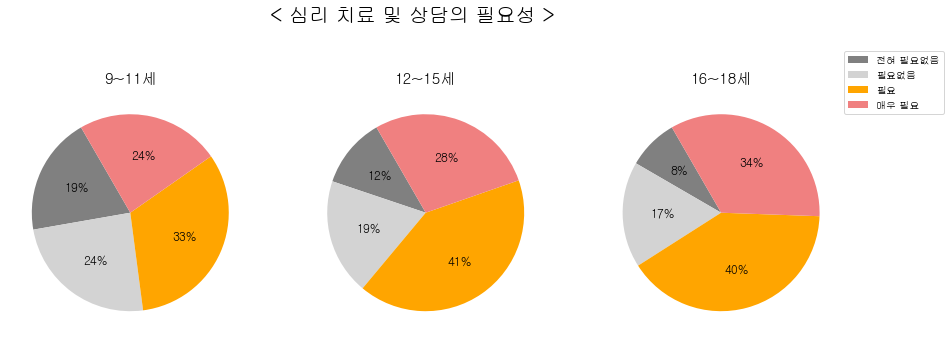

In [119]:
fig = plt.figure(figsize = (15,6))

plt.subplot(1,3,1)
plt.pie(cure_2021['9~11세'], autopct = '%.f%%', startangle = 120
       , colors = ['gray','lightgray','orange','lightcoral'], textprops = {'fontsize':12})
plt.title('9~11세', size = 15)

plt.subplot(1,3,2)
plt.pie(cure_2021['12~15세'], autopct = '%.f%%', startangle = 120
       , colors = ['gray','lightgray','orange','lightcoral'], textprops = {'fontsize':12})
plt.title('12~15세', size = 15)

plt.subplot(1,3,3)
plt.pie(cure_2021['16~18세'], autopct = '%.f%%', startangle = 120
       , colors = ['gray','lightgray','orange','lightcoral'], textprops = {'fontsize':12})
plt.title('16~18세', size = 15)

plt.legend(cure_2021.index, loc = (1, 0.9))
fig.suptitle('< 심리 치료 및 상담의 필요성 >', size = 20)
plt.show()

## 청소년 지원 기관에 대한 정보 (2021년)

In [120]:
info_2021 = info.iloc[4:7].copy()
info_2021.columns = ['특성','연령대','사례수(명)','전혀 필요없음','필요없음','필요','매우 필요']
info_2021['사례수(명)'] = info_2021['사례수(명)'].str.replace(',','').astype('int64')
info_2021['전혀 필요없음'] = info_2021['전혀 필요없음'].astype('float')
info_2021['필요없음'] = info_2021['필요없음'].astype('float')
info_2021['필요'] = info_2021['필요'].astype('float')
info_2021['매우 필요'] = info_2021['매우 필요'].astype('float')
info_2021 = info_2021.drop(['특성','사례수(명)'], axis = 1).set_index('연령대').T
info_2021

연령대,9~11세,12~15세,16~18세
전혀 필요없음,18.9,14.1,9.0
필요없음,31.9,21.9,18.1
필요,31.8,39.9,43.6
매우 필요,17.3,24.0,29.3


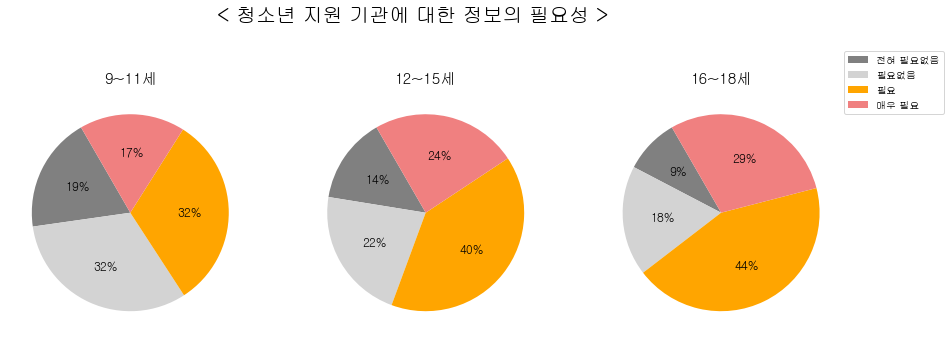

In [121]:
fig = plt.figure(figsize = (15,6))
plt.subplot(1,3,1)
plt.pie(info_2021['9~11세'], autopct = '%.f%%', startangle = 120
       , colors = ['gray','lightgray','orange','lightcoral'], textprops = {'fontsize':12})
plt.title('9~11세', size = 15)
plt.subplot(1,3,2)
plt.pie(info_2021['12~15세'], autopct = '%.f%%', startangle = 120
       , colors = ['gray','lightgray','orange','lightcoral'], textprops = {'fontsize':12})
plt.title('12~15세', size = 15)
plt.subplot(1,3,3)
plt.pie(info_2021['16~18세'], autopct = '%.f%%', startangle = 120
       , colors = ['gray','lightgray','orange','lightcoral'], textprops = {'fontsize':12})
plt.title('16~18세', size = 15)
plt.legend(info_2021.index, loc = (1, 0.9))
fig.suptitle('< 청소년 지원 기관에 대한 정보의 필요성 >', size = 20)
plt.show()

## 심리 상담의 도움을 받아봤는지 (2020년)

In [122]:
help_2020 = help.iloc[2:5].copy()
help_2020.columns = ['특성','연령대','받았다','안받았다']
help_2020['받았다'] = help_2020['받았다'].astype('float')
help_2020['안받았다'] = help_2020['안받았다'].astype('float')
help_2020 = help_2020.drop(['특성'], axis = 1).set_index('연령대').T

help_2020


연령대,만9-12세,만13-18세,만19-24세
받았다,1.8,4.0,1.3
안받았다,98.2,96.0,98.7


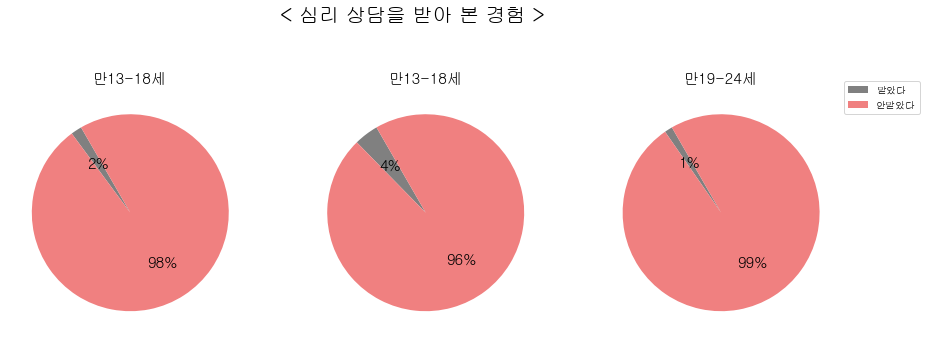

In [123]:
fig = plt.figure(figsize = (15,6))

plt.subplot(1,3,1)
plt.pie(help_2020['만9-12세'], autopct = '%.f%%', startangle = 120
       , colors = ['gray','lightcoral'], textprops = {'fontsize':15})
plt.title('만13-18세', size = 15)

plt.subplot(1,3,2)
plt.pie(help_2020['만13-18세'], autopct = '%.f%%', startangle = 120
       , colors = ['gray','lightcoral'], textprops = {'fontsize':15})
plt.title('만13-18세', size = 15)

plt.subplot(1,3,3)
plt.pie(help_2020['만19-24세'], autopct = '%.f%%', startangle = 120
       , colors = ['gray','lightcoral'], textprops = {'fontsize':15})
plt.title('만19-24세', size = 15)

plt.legend(help_2020.index, loc = (1, 0.9))
fig.suptitle('< 심리 상담을 받아 본 경험 >', size = 20)
plt.show()

# 상담 인원 현황


## 청소년 지도사 현황

# 청소년 상담 지원 현황

In [129]:
support_age = support[['구분','대상별(초) ','대상별(중)','대상별(고)']].copy()
support_age.columns = ['구분','초등','중등','고등']
support_age.head()

,구분,초등,중등,고등
0,가족,145944,152565,106933
1,일탈 및 비행,89622,177569,147848
2,학업/진로,126989,222118,184215
3,성,18412,29783,22990
4,성격,170864,85050,52842



# 연도별 전국 청소년 상담내용

In [131]:
advice.columns=['원인','2014','2015','2016','2017','2018','2019','2020','2021']
advice = advice.drop(advice.index[0])
advice

,원인,2014,2015,2016,2017,2018,2019,2020,2021
1,NaN,2014,2015,2016,2017,2018,2019,2020,2021
2,계,"4,135,837","3,975,462","4,290,551","4,643,628","5,055,678","5,141,941","3,973,053","5,098,132"
3,가정,"287,465","304,204","335,743","357,471","388,601","383,802","416,755","485,261"
4,일탈/?비행,"427,998","448,964","414,885","442,572","522,910","584,748","405,338","460,653"
5,학업/?진로,"1,145,148","812,280","846,273","826,084","839,102","690,481","513,842","615,546"
6,성,"79,638","70,556","70,055","90,112","86,701","83,249","69,612","82,274"
7,대인?관계,"789,687","888,650","1,062,059","1,257,287","1,329,866","1,408,054","854,287","1,116,861"
8,성격,"304,951","305,755","301,534","329,809","340,885","340,877","246,329","341,910"
9,정신?건강,"427,677","471,611","521,613","567,981","738,188","826,767","788,782","1,130,526"
10,생활?습관?태도,"31,649","36,358","47,216","40,173","41,507","37,208","38,444","44,123"


In [115]:
client

,통계표명:,연도별 전국 청소년 상담내용 현황,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,단위:,건,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2014,2015,2016,2017,2018,2019,2020,2021
2,계,"4,135,837","3,975,462","4,290,551","4,643,628","5,055,678","5,141,941","3,973,053","5,098,132"
3,가정,"287,465","304,204","335,743","357,471","388,601","383,802","416,755","485,261"
4,일탈/?비행,"427,998","448,964","414,885","442,572","522,910","584,748","405,338","460,653"
5,학업/?진로,"1,145,148","812,280","846,273","826,084","839,102","690,481","513,842","615,546"
6,성,"79,638","70,556","70,055","90,112","86,701","83,249","69,612","82,274"
7,대인?관계,"789,687","888,650","1,062,059","1,257,287","1,329,866","1,408,054","854,287","1,116,861"
8,성격,"304,951","305,755","301,534","329,809","340,885","340,877","246,329","341,910"
9,정신?건강,"427,677","471,611","521,613","567,981","738,188","826,767","788,782","1,130,526"


In [116]:
support_age = support[['구분','대상별(초) ','대상별(중)','대상별(고)']].copy()
support_age.columns = ['구분','초등','중등','고등']
support_age.head(5)

,구분,초등,중등,고등
0,가족,145944,152565,106933
1,일탈 및 비행,89622,177569,147848
2,학업/진로,126989,222118,184215
3,성,18412,29783,22990
4,성격,170864,85050,52842


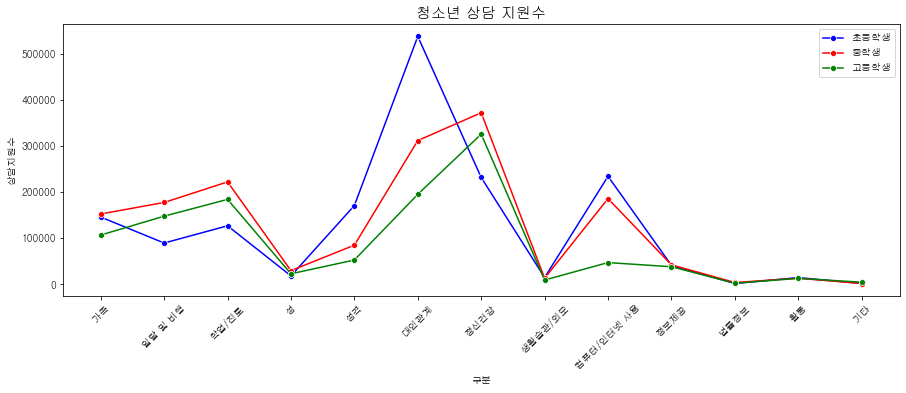

In [75]:
plt.rcParams['figure.figsize']=(15,5)
sns.lineplot(data=support_age, x='구분', y='초등', ci=None, estimator=sum, color='blue', marker='o', ls='-',label='초등학생')
sns.lineplot(data=support_age, x='구분', y='중등', ci=None, estimator=sum, color='r', marker='o', ls='-',label='중학생')
sns.lineplot(data=support_age, x='구분', y='고등', ci=None, estimator=sum, color='g', marker='o', ls='-',label='고등학생')
plt.xticks(rotation=45)
plt.ylabel('상담지원수')
plt.legend(loc=1)
plt.title('청소년 상담 지원수',size=15)
plt.show()
#해야할거_(나이별 년도별) 지역별 학교별


# 청소년 자살률

In [76]:
suicide_age = suicide.iloc[:5]
suicide_age = suicide_age.drop(suicide_age.index[1:3])
suicide_age = suicide_age.drop(['연령별(1)'], axis = 1)
suicide_age = suicide_age.set_index('연령별(2)').T
suicide_age['0∼14세'] = suicide_age['0∼14세'].astype('float')
suicide_age['15~19세'] = suicide_age['15~19세'].astype('float')
suicide_age['청소년'] = suicide_age.loc[:, '0∼14세':'15~19세'].sum(axis = 1)
suicide_age.head()


연령별(2),연령별(2),0∼14세,15~19세,청소년
2009,자살 사망자수 (명),9.0,68.0,77.0
2009.1,자살률 (10만명당 명),1.5,10.2,11.7
2010,자살 사망자수 (명),10.0,53.0,63.0
2010.1,자살률 (10만명당 명),1.7,7.9,9.6
2011,자살 사망자수 (명),5.0,55.0,60.0


In [77]:
suicide_num = suicide_age.iloc[::2,:]
suicide_num = suicide_num.reset_index()
suicide_num['index'] = suicide_num['index'].astype('int64')
suicide_num.head()

연령별(2),index,연령별(2),0∼14세,15~19세,청소년
0,2009,자살 사망자수 (명),9.0,68.0,77.0
1,2010,자살 사망자수 (명),10.0,53.0,63.0
2,2011,자살 사망자수 (명),5.0,55.0,60.0
3,2012,자살 사망자수 (명),7.0,51.0,58.0
4,2013,자살 사망자수 (명),7.0,46.0,53.0


In [78]:
suicide_per = suicide_age.iloc[1::2,:]
suicide_per = suicide_per.reset_index()
suicide_per['index'] = suicide_per['index'].str[:4].astype('int64')
suicide_per.head()

연령별(2),index,연령별(2),0∼14세,15~19세,청소년
0,2009,자살률 (10만명당 명),1.5,10.2,11.7
1,2010,자살률 (10만명당 명),1.7,7.9,9.6
2,2011,자살률 (10만명당 명),0.9,8.3,9.2
3,2012,자살률 (10만명당 명),1.3,7.9,9.2
4,2013,자살률 (10만명당 명),1.4,7.4,8.8


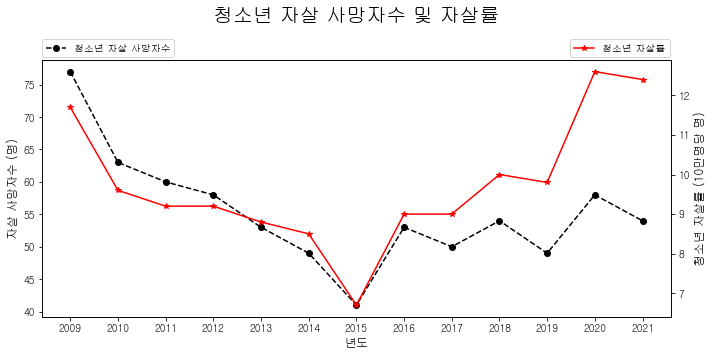

In [79]:
fig, ax1 = plt.subplots(figsize = (10,5))

ax1.plot(suicide_num['index'], suicide_num['청소년'], 'ko--', label = '청소년 자살 사망자수')
ax1.legend(loc = (0, 1.01))
ax1.set_xlabel('년도', size = 12)
ax1.set_ylabel('자살 사망자수 (명)', size = 12)

ax2 = ax1.twinx()
ax2.plot(suicide_per['index'], suicide_per['청소년'], 'r*-', label = '청소년 자살률')
ax2.legend(loc = (0.84, 1.01))
ax2.set_ylabel('청소년 자살률 (10만명당 명)', size = 12)

fig.suptitle('청소년 자살 사망자수 및 자살률', size = 20)
plt.xticks(range(2009, 2022, 1))
plt.tight_layout()
plt.show()

# 지역별 상담 운영 현황


## 지역 단위별 상담이력

In [80]:
si_do.columns = ['번호','지역명','전체상담수','가족','일탈','학업진로','성','대인관계','성격','정신건강','생활습관태도','활동','PC인터넷','단순정보제공']
si_do_2 = si_do.drop(['번호'], axis = 1).drop(si_do.index[-1])
si_do_2.sort_values('전체상담수', ascending = False)


,지역명,전체상담수,가족,일탈,학업진로,성,대인관계,성격,정신건강,생활습관태도,활동,PC인터넷,단순정보제공
8,경기,1107832,72369,107464,228042,10359,335253,76329,122396,14145,15593,66070,59812
0,서울,758827,78683,71060,119812,12610,184396,47469,129715,8272,14681,37625,54504
15,경남,437725,437725,27989,103587,6032,119429,37247,44032,5605,7316,33582,18126
1,부산,321413,32947,24596,51673,9449,81800,26815,40587,5070,546,26709,21221
11,충남,241549,10780,27372,75094,8754,42982,11840,15566,1796,8443,27338,11584
14,경북,189928,189928,9982,46845,3928,52687,17410,14830,1676,1407,25957,3996
12,전북,184650,184650,20484,55708,1822,34220,7760,21161,1108,6719,16776,10542
3,인천,162143,12063,22182,19220,2086,27718,8864,41185,821,3336,11626,13042
10,충북,152053,7223,20899,31540,3697,28346,8147,16050,1711,2525,19452,12463
13,전남,146270,146270,23685,29289,3492,20948,11453,12983,1152,2404,19804,11775


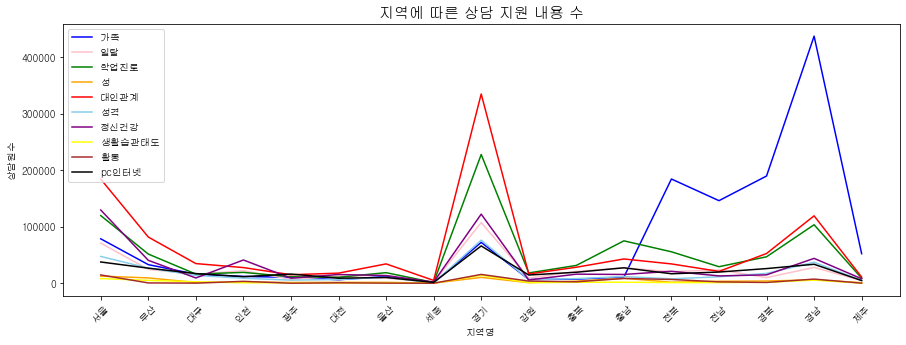

In [81]:
plt.rcParams['figure.figsize']=(15,5)
sns.lineplot(data=si_do_2, x='지역명', y='가족', ci=None, estimator=sum, color='blue', ls='-',label='가족')
sns.lineplot(data=si_do_2, x='지역명', y='일탈', ci=None, estimator=sum, color='pink', ls='-',label='일탈')
sns.lineplot(data=si_do_2, x='지역명', y='학업진로', ci=None, estimator=sum, color='g', ls='-',label='학업진로')
sns.lineplot(data=si_do_2, x='지역명', y='성', ci=None, estimator=sum, color='orange', ls='-',label='성')
sns.lineplot(data=si_do_2, x='지역명', y='대인관계', ci=None, estimator=sum, color='r', ls='-',label='대인관계')
sns.lineplot(data=si_do_2, x='지역명', y='성격', ci=None, estimator=sum, color='skyblue', ls='-',label='성격')
sns.lineplot(data=si_do_2, x='지역명', y='정신건강', ci=None, estimator=sum, color='purple', ls='-',label='정신건강')
sns.lineplot(data=si_do_2, x='지역명', y='생활습관태도', ci=None, estimator=sum, color='yellow', ls='-',label='생활습관태도')
sns.lineplot(data=si_do_2, x='지역명', y='활동', ci=None, estimator=sum, color='brown', ls='-',label='활동')
sns.lineplot(data=si_do_2, x='지역명', y='PC인터넷', ci=None, estimator=sum, color='black', ls='-',label='pc인터넷')
plt.xticks(rotation=45)

plt.ylabel('상담원수')
plt.legend(loc=2)
plt.title('지역에 따른 상담 지원 내용 수',size=15)
plt.show()


## 전국 청소년 상담 복지센터 현황

In [82]:
center.head()


,센터명,지역,분소이름,우편번호,주소,1388 상담전화,행정전화,팩스,홈페이지
0,서울시청소년상담복지센터,서울,NaN,4543,서울특별시 중구 을지로 11길 23 7층,02-2285-1318,02-2285-1318,02-2285-1315,www.teen1318.or.kr
1,노원구청소년상담복지센터,서울,NaN,1616,서울특별시 노원구 수락산로212-19 2층,02-2091-1388,02-2091-1388,050-2209-1313,www.nowonyouthcenter.org
2,양천구청소년상담복지센터,서울,NaN,8067,"서울특별시 양천구 남부순환로83길 53, 신월6동 행정복합타운 2층",02-2646-8341,02-2646-8341,02-2646-8342,http://yangcheon1388.or.kr/
3,영등포구청소년상담복지센터,서울,NaN,7317,"서울특별시 영등포구 도영로22길 36 해광빌딩 2,3층",02-2676-6114,02-844-0924,02-2636-2071,www.young1318.com
4,동작구청소년상담복지센터,서울,NaN,7062,서울특별시 동작구 여의대방로 20길 61 시립보라매청소년센터 슬기동 2층,02-845-1388,02-834-1355,02-831-0365,http://djyc1388.or.kr/


In [83]:
center_country = center.groupby('지역')['센터명'].count().sort_values(ascending = False)
center_country = center_country.reset_index()
center_country = center_country.replace('세종','세종시')
center_country

,지역,센터명
0,경기,53
1,서울,26
2,전남,24
3,경남,23
4,경북,23
5,충남,16
6,부산,16
7,전북,15
8,강원,14
9,충북,13


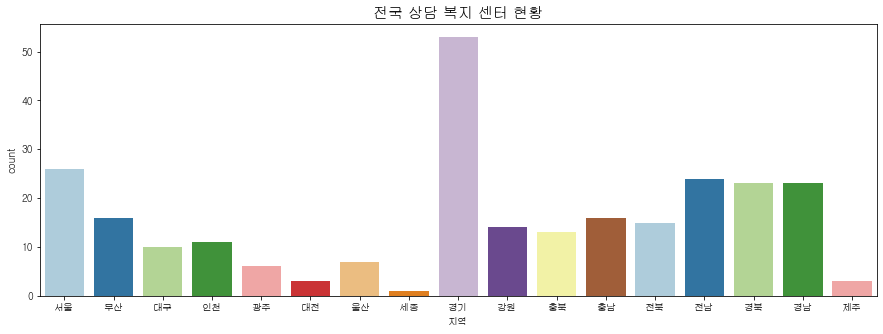

In [134]:
plt.rcParams['figure.figsize']=(15,5)
sns.countplot(data=center,x='지역',palette='Paired')
plt.title("전국 상담 복지 센터 현황", size=15)

plt.show()